### Μέλη Ομάδας:
Ον/μο1:  Σωτήρου Θεόδωρος
Αρ. Μητρώου 1:  03118209

Ον/μο2:  Χατζησάββας Αντρέας
Αρ. Μητρώου 2:  03118701

# Τεχνητή Νοημοσύνη: Εργαστηριακή Άσκηση 3 
Στην άσκηση αυτή θα υλοποιηθούν διάφοροι (σχετικά απλοί) αλγόριθμοι μηχανικής μάθησης για την αυτόματη αναγνώριση μεταξύ 3 μουσικών είδών απο τα δεδομένα που προσφέρει η υπηρεσία Spotify. Συγκεκριμένα, θα δίνονται δύο σύνολα δεδομένων $$Ζ_{train}=\{(x_1,y_1),\dots,(x_n,y_n)\}$$ $$Z_{test} = \{(x_j,y_j),\dots{,(x_k,y_k)}\}$$ όπου κάθε $x_i\in{\mathbb{R}^p}$ είναι ένα διάνυσμα με τα μουσικά χαρακτηριστικά κάθε κομματιού (όπως dancability, acousticness κ.α.) και $y_i$ είναι το είδος του κομματιού - ένας ακέραιος στο $[0,2]$. Σε κάθε περίπτωση καλείστε να σχεδιάσετε έναν ταξινομητή, δηλαδή μια απεικόνιση $$f:\mathbb{R}^p\rightarrow{[0,2]}$$

# 1ο Μέρος: Αξιολόγηση
Στο πρώτο μέρος της άσκησης θα υλοποιηθούν συναρτήσεις που θα χρησιμοποιηθούν για την αξιολόγηση των ταξινομητών που θα χρησιμοποιηθούν στα επόμενα μέρη.

Παρακάτω σας δίνεται η κλάση Evaluate, η οποία υπολογίζει διάφορες μετρικές με τη μέθοδο get_metrics, εντοπίζει αντικείμενα που ταξινομήθηκαν λάθος και τα εμφανίζει (μέθοδος get_sample_of_wrong), και υπολογίζει τον πίνακα σύγχυσης (confusion matrix) όπου οπτικοποιούνται ανά κατηγορία οι προβλέψεις του ταξινομητή.

Για το μέρος αυτό καλείστε να υλοποιήσετε στη μέθοδο my_accuracy τη μετρική accuracy, η οποία ορίζεται ως:
$$accuracy = \frac{\#σωστών\_προβλέψεων}{\#δεδομένων}$$



In [1]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from matplotlib import pyplot as plt
import numpy as np
import random

class Evaluate:
    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred

    def my_accuracy(self):
      y_true = self.y_true
      y_pred = self.y_pred
      
      ##################
      ## Your code below
      length = len(y_true)
      correct = 0
      for i in range(length):
            if y_true[i] == y_pred[i]:
                correct += 1
      acc = correct/length
      ## Your code above
      ##################
      return acc

    def get_metrics(self):
        precision = precision_score(self.y_true, self.y_pred, average = "macro")
        recall = recall_score(self.y_true, self.y_pred, average = "macro")
        f1 = f1_score(self.y_true, self.y_pred, average = "macro")
        results = {"precision": precision, "recall": recall, "f1": f1, "accuracy": self.my_accuracy()}
        return results   
    
    def confusion_matrix(self):
        cm = confusion_matrix(self.y_true, self.y_pred)
        return cm 

    def get_evaluation_report(self):
        metrics = self.get_metrics()
        for m in metrics:
            print(m + ': ' + str(metrics[m]))
        cm = self.confusion_matrix()
        print("Confusion matrix: ")
        print(cm)

Παράδειγμα χρήσης της κλάσης. Κανονικά στο x θα υπάρχουν τα δεδομένα από το dataset

In [2]:
y_true = np.array([1, 0, 0, 1])
y_pred = [1, 0, 1, 0]

eval = Evaluate(y_true, y_pred)
eval.get_evaluation_report()

precision: 0.5
recall: 0.5
f1: 0.5
accuracy: 0.5
Confusion matrix: 
[[1 1]
 [1 1]]


# Dataset

To dataset που σας δίνεται περιέχει πληθώρα μουσικών κομματιών για τα οποία έχουν καταγραφεί διάφορα χαρακτηριστικά τους, όπως επίσης και το μουσικό είδος στο οποίο ανήκουν. Στη συγκεκριμένη άσκηση θα δουλέψουμε με ένα υποσύνολο (αριθμητικών) χαρακτηριστικών, τα οποία συνεισφέρουν στον καθορισμό της μουσικής κατηγορίας κάθε κομματιού.  

Τα χαρακτηριστικά τα οποία θα μελετήσουμε στην παρούσα άσκηση είναι τα "acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness", ενώ οι κατηγορίες στις οποίες καλούμαστε να ταξινομήσουμε τα μουσικά κομμάτια είναι οι "Electronic", "Rock", και "Rap".  


In [3]:
# Σύνδεση του Google Colab με το Google Drive

from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

Θα χρησιμοποιήσουμε τα DataFrames της βιβλιοθήκης pandas για να χειριστούμε τα δεδομένα μας. Μπορείτε να βρείτε περισσότερες πληροφορίες για τα pandas DataFrames στο αντίστοιχο [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

In [4]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm 

In [5]:
# read data in the form of pandas DataFrame
data = pd.read_csv(r"C:\Users\OWNER\Downloads\music_df_processed.csv")

# print the first 5 values of the DataFrame using .head() command
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [6]:
# What can we see here?
data.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,45020.000000,45020.000000,45020.000000,45020.000000,4.502000e+04,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000
mean,55884.691892,44.263327,0.306596,0.558532,2.211695e+05,0.599553,0.181843,0.193951,-9.137016,0.093783,119.952961,0.456394
std,20728.197040,15.553972,0.341391,0.178858,1.276884e+05,0.264510,0.325847,0.161715,6.156400,0.101469,30.641701,0.247161
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,34.347000,0.000000
25%,38000.750000,34.000000,0.020100,0.442000,1.747230e+05,0.432000,0.000000,0.096900,-10.860000,0.036100,94.941500,0.257000
50%,55857.500000,45.000000,0.145000,0.568000,2.194385e+05,0.642000,0.000159,0.126000,-7.284000,0.048900,119.879000,0.448000
75%,73856.500000,56.000000,0.551000,0.687000,2.686400e+05,0.815250,0.154000,0.244000,-5.177000,0.098800,140.471250,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.497994e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.276000,0.992000


## Επιλογή χαρακτηριστικών x και στόχων y.  

Για λόγους απλότητας επιλέγουμε τα χαρακτηριστικά (inputs) και τις κατηγορίες-στόχους (genres). Καλείστε να διαχωρίσετε τα δεδομένα σε train/test set. Ας θεωρήσουμε το διαχωρισμό 30% - test set, 70% - train set.

In [7]:
# χαρακτηριστικά
inputs = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness"]

# κατηγορίες-στόχοι
output = "music_genre"
genres = ["Electronic", "Rock", "Rap"]

# φιλτράρουμε το DataFrame ώστε να διατηρήσουμε μόνο τις 3 κατηγορίες που μας ενδιαφέρουν.

data = data[data[output].isin(genres)]

# dictionary to map genre to label id 
genres_to_id = {genre: i for i, genre in enumerate(genres)}

# εδώ πρέπει να διαχωρίσετε τα δεδομένα σε train (70% των δεδομένων)/test set (30% των δεδομένων)
# ονομάστε τις μεταβλητές ως εξής:
# τα χαρακτηριστικά του train set: x_train
# τις κατηγορίες-στόχους του train set: y_train
# τα χαρακτηριστικά του test set: x_test
# τις κατηγορίες-στόχους του test set: y_test
x_test, y_test, x_train, y_train = [], [], [], []
##################
## Your code below

#Τυχαιοποίηση του data
data = data.sample(frac=1).reset_index(drop=True)
characteristics = data[inputs]
goal_genres = data[[output]]

check = 0
for i in range(len(goal_genres)):
    check = goal_genres.iat[i,0]
    if check == "Electronic":
        check = 0
    elif check == "Rap":
        check = 1
    else:
        check = 2
    goal_genres.iat[i,0] = check
        


if (data.shape[0] != 13531):
    raise Exception("Sorry, data overlap. Try running cell that reads data again.")
else:
    #Διαλέγουμε ορισμένα δεδομένα για τα x και y.
    y_test = goal_genres.iloc[np.r_[0:1339, 4466:5834, 8970:10322]].reset_index(drop = True)
    x_test = characteristics.iloc[np.r_[0:1339, 4466:5834, 8970:10322]].reset_index(drop = True)
    y_train= goal_genres.iloc[np.r_[1339:4466, 5834:8970, 10322:13531]].reset_index(drop = True)
    x_train = characteristics.iloc[np.r_[1339:4466, 5834:8970, 10322:13531]].reset_index(drop = True)

    
# Your code above
#################

## Μορφή των δεδομένων  

Βεβαιωθείτε ότι τα δεδομένα σας έχουν τη σωστή μορφή εκτυπώνοντας τον αριθμό γραμμών και στηλών για τα x_test, y_test, x_train, y_train.

In [8]:
# Shape of x_test, y_test, x_train, y_train

##################
## Your code below
print("Rows for  x_test, y_test, x_train, y_train:",  x_test.shape[0], y_test.shape[0], x_train.shape[0], y_train.shape[0])
print("Columns for x_test, y_test, x_train, y_train:",  len(x_test.columns), len(y_test.columns), len(x_train.columns), len(y_train.columns))
## Your code above
##################

Rows for  x_test, y_test, x_train, y_train: 4059 4059 9472 9472
Columns for x_test, y_test, x_train, y_train: 6 1 6 1


Αναφορικά με τις τιμές των χαρακτηριστικών, είναι σημαντικό να γνωρίζουμε το εύρος τους, δηλαδή τη μέγιστη και την ελάχιστη τιμή που λαμβάνει το κάθε χαρακτηριστικό. Εξερευνήστε το εύρος του κάθε χαρακτηριστικού στα train και test set. 

In [9]:
# Range of x_train, x_test columns

##################
## Your code below
print("Maximun and minimun values of x_test:")
print(pd.concat([pd.Series(x_test.max(), name="maxes").to_frame(), pd.Series(x_test.min(), name="mins").to_frame()], axis = 1))
print("Maximun and minimun values of x_train:")
print(pd.concat([pd.Series(x_train.max(), name="maxes").to_frame(), pd.Series(x_train.min(), name="mins").to_frame()], axis = 1))
## Your code above
##################

Maximun and minimun values of x_test:
                  maxes      mins
acousticness      0.984  0.000001
danceability      0.973  0.096400
energy            0.998  0.021100
instrumentalness  0.986  0.000000
liveness          0.989  0.017300
speechiness       0.883  0.023300
Maximun and minimun values of x_train:
                  maxes      mins
acousticness      0.994  0.000002
danceability      0.977  0.064500
energy            0.999  0.002590
instrumentalness  0.980  0.000000
liveness          0.991  0.020800
speechiness       0.922  0.022400


Από την παραπάνω ανάλυση προκύπτουν κάποια ερωτήματα σημαντικά για τα επόμενα βήματα:
- Έχουν τα χαρακτηριστικά μας περίπου το ίδιο εύρος;

- Σε πολλές εφαρμογές είναι σημαντικό τα χαρακτηριστικά να βρίσκονται στο εύρος [0, 1]. Ισχύει αυτό στην περίπτωσή μας; 

# 2o Μέρος: Υλοποίηση KNN
Στο δεύτερο μέρος της άσκησης θα υλοποιήσετε τον αλγόριθμο KNN για ταξινόμηση. Υπενθυμίζεται από τις διαφάνειες το πλάνο σχεδιασμού για τον ταξινομητή k κοντινότερων γειτόνων:
- Αποθηκεύουμε όλα τα δεδομένα ($Z_{train}$) στη μνήμη
  - Τα δεδομένα μπορούν αποθηκευτούν σε έναν πίνακα $n\times{p}$ με χρήση του numpy
- Συγκρίνουμε την είσοδο με τα δεδομένα και βρίσκουμε τα k κοντινότερα ($k<n$) με βάση κάποια απόσταση.
  - Όταν μας δίνεται ένα "φρέσκο" δείγμα ως διάνυσμα από χαρακτηριστικά $x_i$ χρειαζόμαστε μια συνάρτηση που να υπολογίζει την απόσταση $d(x_i,x_j)$, όπου $x_j$ είναι το διάνυσμα που αντιστοιχεί στα χαρακτηριστικά ενός δείγματος από τα δεδομένα εκπαίδευσης. Θα πειραματιστείτε με την ευκλείδια απόσταση και την απόσταση συνημιτόνου. Στη συνέχεια ταξινομούνται τα δεδομένα εκπαίδευσης ως προς την απόστασή τους από το $x_i$ και επιλέγονται τα $k$ κοντινότερα
- Δίνουμε στην έξοδο την κλάση στην οποία ανήκει η πλειοψηφία των k κοντινότερων δεδομένων.

Αφού κατασκευαστεί ο ταξινομητής θα αξιολογήσετε την επίδοσή του στα 100 πρώτα δείγματα του $Z_{test}$ για κάποιες τιμές του k που θα επιλέξετε εσείς, ξεκινώντας από $k=1$.

Στην πράξη πολύ σπάνια θα χρειαστεί να υλοποιήσετε έναν αλγόριθμο μηχανικής μάθησης από το μηδέν, αφού υπάρχουν έτοιμες υλοποιήσεις, π.χ. σε πακέτα της python, οι οποίες είναι βελτιστοποιημένες και εύχρηστες. Το τελευταίο ζητούμενο  στο 2ο μέρος είναι να επαναλάβετε το παραπάνω πείραμα με την έτοιμη υλοποίηση του KNN που παρέχει η βιβλιοθήκη sklearn. Καλείστε να συγκρίνετε τα αποτελέσματα και τους χρόνους εκτέλεσης.

 Σας δίνεται η κλάση KNN η οποία αρχικοποιείται με ένα σύνολο από δεδομένα x, ετικέτες y και το k για τον αλγόριθμο. Καλείστε να συμπληρώσετε τον κώδικα που λείπει στις μεθόδους distance, get_knn, και classify.

Η απόσταση συνημιτόνου μεταξύ δύο διανυσμάτων u,v ορίζεται ως: $$d(u,v)= 1 - \frac{u\cdot{v}}{||u||_2||v||_2}$$

In [28]:
from numpy import ndarray
from numpy import linalg
from numpy import inner
from numpy import subtract
class KNN:
    def __init__(self, x, y, k, distance = "euclidean"):
        self.x = x
        self.y = y
        self.k = k
        self.distance = distance
        
    ## Compute the distance between the two vectors (2 rows of the DataFrame)
    # hint: use np.linalg.norm for eucledian
    # hint: use equation given above for cosine
    def get_distance(self, row1, row2):
      if self.distance=='euclidean':
        ##################
        ## Your code below
        diff = subtract(row1,row2)
        dist = linalg.norm(diff)
        ## Your code above
        ##################
      elif self.distance=='cosine':
        ##################
        ## Your code below
        dist = 1 -inner(row1,row2)/(linalg.norm(row1)*linalg.norm(row2))
        ## Your code above
        ##################
        #pass

      return dist

    ## Given a DataFrame row as a vector, returns indexes of k nearest neighbors
    def get_knn(self, row):
      distances = list()
      x = self.x
      k = self.k
      
      ##################
      ## Your code below - populate the distances list
      # hint: you can use a for loop
      distances = [self.get_distance(row, rowy) for rowy in x]
      ## Your code above
      ##################

      # Sort distances, and return the indexes of k first elements
      ans_indexes = np.argsort(distances)[:k]
      return ans_indexes

    ## Given a DataFrame row as a vector, classify it according to KNN
    # hint: we have a list of k labels and want to return the most common one
    def classify(self, row):
      y = self.y
      nn_labels = [y[i] for i in self.get_knn(row)]
      
      ##################
      ## Your code below
      #borei na yparxei synarthsh numpy
      elec, rap, rock = 0, 0, 0
      for i in range(len(nn_labels)):
        if nn_labels[i] == 0:
            elec += 1
        elif nn_labels[i] == 1:
            rap += 1
        else:
            rock += 1
      
      (maxim,prediction) = max([(elec,0),(rap,1),(rock,2)])
      ## Your code above
      ###################
      return prediction

if type(x_test) == ndarray:
    print("Already numpy arrays")
else:
    x_test = x_test.to_numpy()
    y_test = y_test["music_genre"].to_numpy()
    x_train = x_train.to_numpy()
    y_train = y_train["music_genre"].to_numpy()
knn = KNN(x_train, y_train, k=5, distance='euclidean')

Already numpy arrays


Τώρα που είναι έτοιμος ο ταξινομητής ας δούμε τι προβλέπει σε μεμονωμένα δείγματα.

## Αξιολόγηση του KNN

In [56]:
preds = [knn.classify(x_test[i]) for i in range(100)]
labels = [y_test[i] for i in range(1000)]

In [30]:
eval = Evaluate(labels[:100], preds)
eval.get_evaluation_report()

precision: 0.7147741147741148
recall: 0.7037037037037037
f1: 0.7001566452155398
accuracy: 0.7
Confusion matrix: 
[[22  8  6]
 [ 1 23  8]
 [ 3  4 25]]


## Έτοιμος ΚΝΝ classifier

Όπως και με τους περισσότερους αλγορίθμους μηχανικής μάθησης, υπάρχουν έτοιμες βελτιστοποιημένες υλοποιήσεις. Παρακάτω δείχνουμε ένα παράδειγμα χρήσης του ταξινομητή ΚΝΝ που παρέχει η βιβλιοθήκη sklearn ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)).

In [31]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
knc = KNeighborsClassifier(n_neighbors = k)
knc.fit(x_train, y_train.astype('int'))
y_pred = knc.predict(x_test[:100])
eval = Evaluate(y_test[:100].tolist(), y_pred.tolist())
eval.get_evaluation_report()

precision: 0.7131297964631299
recall: 0.7025462962962963
f1: 0.7007604974356892
accuracy: 0.7
Confusion matrix: 
[[23  7  6]
 [ 1 24  7]
 [ 3  6 23]]


## Σύγκριση υλοποιήσεων

Στα παρακάτω κελιά πειραματιστείτε με τις δύο υλοποιήσεις (τη δική σας και την έτοιμη). Βεβαιωθείτε πως προκύπτουν τα ίδια αποτελέσματα για διάφορες τιμές του k (για ευκλείδια απόσταση) και μετρήστε τους χρόνους εκτέλεσης.

Για τους χρόνους εκτέλεσης για k = 5 τρέχουμε τα 3 παρακάτω κελιά:

In [39]:
%%time
knn = KNN(x_train, y_train, k = 5, distance = 'euclidean')
preds = [knn.classify(x_test[i]) for i in range(100)]

Wall time: 4.95 s


In [40]:
eval = Evaluate(labels[:100], preds)
eval.get_evaluation_report()

precision: 0.7147741147741148
recall: 0.7037037037037037
f1: 0.7001566452155398
accuracy: 0.7
Confusion matrix: 
[[22  8  6]
 [ 1 23  8]
 [ 3  4 25]]


In [41]:
%%time
knn = KNN(x_train, y_train, k = 5, distance = 'cosine')
preds = [knn.classify(x_test[i]) for i in range(5)]

Wall time: 516 ms


In [42]:
eval = Evaluate(labels[:5], preds)
eval.get_evaluation_report()

precision: 0.8888888888888888
recall: 0.8333333333333334
f1: 0.8222222222222223
accuracy: 0.8
Confusion matrix: 
[[1 0 1]
 [0 1 0]
 [0 0 2]]


In [43]:
%%time
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train.astype('int'))
y_pred = knc.predict(x_test[:100])

Wall time: 26.3 ms


In [45]:
eval = Evaluate(labels[:100], y_pred)
eval.get_evaluation_report()

precision: 0.7131297964631299
recall: 0.7025462962962963
f1: 0.7007604974356892
accuracy: 0.7
Confusion matrix: 
[[23  7  6]
 [ 1 24  7]
 [ 3  6 23]]


Για τους χρόνους εκτέλεσης για k = 50 τρέχουμε τα 3 παρακάτω κελιά:

In [46]:
%%time
knn = KNN(x_train, y_train, k = 50, distance = 'euclidean')
preds = [knn.classify(x_test[i]) for i in range(100)]

Wall time: 5.11 s


In [47]:
eval = Evaluate(labels[:100], preds)
eval.get_evaluation_report()

precision: 0.7288477951635847
recall: 0.7141203703703703
f1: 0.710416454536198
accuracy: 0.71
Confusion matrix: 
[[22  8  6]
 [ 1 24  7]
 [ 2  5 25]]


In [48]:
%%time
knn = KNN(x_train, y_train, k = 50, distance = 'cosine')
preds = [knn.classify(x_test[i]) for i in range(5)]

Wall time: 554 ms


In [49]:
eval = Evaluate(labels[:5], preds)
eval.get_evaluation_report()

precision: 0.8888888888888888
recall: 0.8333333333333334
f1: 0.8222222222222223
accuracy: 0.8
Confusion matrix: 
[[1 0 1]
 [0 1 0]
 [0 0 2]]


In [37]:
%%time
knc = KNeighborsClassifier(n_neighbors = 50)
knc.fit(x_train, y_train.astype('int'))
y_pred = knc.predict(x_test[:100])

Wall time: 24.5 ms


In [50]:
eval = Evaluate(labels[:100], y_pred)
eval.get_evaluation_report()

precision: 0.7131297964631299
recall: 0.7025462962962963
f1: 0.7007604974356892
accuracy: 0.7
Confusion matrix: 
[[23  7  6]
 [ 1 24  7]
 [ 3  6 23]]


In [51]:
%%time
knn = KNN(x_train, y_train, k = 1, distance = 'euclidean')
preds = [knn.classify(x_test[i]) for i in range(100)]

Wall time: 5.17 s


In [53]:
eval = Evaluate(labels[:100], preds)
eval.get_evaluation_report()

precision: 0.6463954002653693
recall: 0.6284722222222222
f1: 0.6318181818181818
accuracy: 0.63
Confusion matrix: 
[[24  7  5]
 [ 0 21 11]
 [ 4 10 18]]


In [58]:
%%time
knn = KNN(x_train, y_train, k = 100, distance = 'euclidean')
preds = [knn.classify(x_test[i]) for i in range(1000)]

Wall time: 51 s


In [59]:
eval = Evaluate(labels[:1000], preds)
eval.get_evaluation_report()

precision: 0.7177679923580532
recall: 0.7053023736664144
f1: 0.702678049501198
accuracy: 0.704
Confusion matrix: 
[[200  56  81]
 [ 10 266  80]
 [ 41  28 238]]


## Σχολιασμός
- To k δεν φαίνεται να έχει επίδραση στον χρόνο εκτέλεσης. Εξάλλου ο πίνακας με τους κοντινότερους γείτονες ταξινομείται ολόκληρος κάθε φορα στον αλγόριθμο μας, ανεξάρτητα απο την τιμή του k.<br>
- Το k δεν φαίνεται να επιδρά σηματνικά ούτε στην απόδοση του classifier.<br>
- Όσο τα k και το δείγμα των δεδομένων (x_train) δεν έχουν υπερβολικά μικρές τιμές τα metrics φαίνονται να παραμένουν σταθερά.<br>
- Ο έτοιμος classifier είναι αρκετά γρηγορότερος απο την δική μας υλοποίηση. Τα metrics όμως είναι σχεδόν παρόμοια και στις δυο περιπτώσεις.<br>

# 3ο Μέρος: Naive Bayes
Στο τρίτο μέρος της άσκησης θα υλοποιήσετε τον αλγόριθμο Naive Bayes. Ας θυμηθούμε από τις διαφάνειες:

**Υποθέσεις:**
- Τα χαρακτηριστικά είναι boolean αντί για συνεχή, δηλαδή παίρνουν δύο τιμές 0 ή 1. Συνεπώς, χρειάζεται να τροποποιήσουμε τα χαρακτηριστικά του dataset μας.
  - Για το συγκεκριμένο πρόβλημα μπορούμε να 'σπάσουμε' τις τιμές κάθε χαρακτηριστικού σε N διαφορετικά bins. Για παράδειγμα, για ένα χαρακτηριστικό που οι τιμές του κυμαίνονται στο [0, 1], για Ν=5, θα έχουμε τα ακόλουθα bins: [0, 0.2), [0.2, 0.4), [0.4, 0.6), [0.6, 0.8), [0.8, 1]. (Γι αυτό το λόγο στα προηγούμενα βήματα αναφέραμε ότι είναι σημαντικό να έχουμε τα χαρακτηριστικά μας στο [0, 1]!)
  
- Η πιθανότητα ένα στοιχείο με χαρακτηριστικά x να ανήκει στην κλάση i δίνεται από τον τύπο:
$$p(i|x)=\frac{p(i)\cdot{\prod_{k=1}^p}p(x^{(k)}|i)}{\sum_{j=1}^pp(x^{(k)}|j)}$$
- Για να ταξινομήσουμε ένα διάνυσμα χαρακτηριστικών x σε μια κλάση i επιλέγουμε την κλάση που μεγιστοποιεί την παραπάνω πιθανότητα
  - Μπορούμε για τη σύγκριση να αγνοήσουμε τον παρονομαστή, αφού για όλες τις κλάσεις θα είναι ίδιος

In [60]:
# κάνουμε κάθε μεταβλήτη του συνόλου εκπαίδευσης διακρίτη σε σε διαστήματα 

def discretize(x, num_of_classes = 5):  
    x_r = []
    for row in x:
        discrete = []
        for i, feature in enumerate(row):
            discrete_feature = [0] * num_of_classes
            for j, v in enumerate(np.linspace(0, 1, num_of_classes + 1)):
                if float(feature) < v:
                    break
            discrete_feature[j-1] = 1
            discrete += discrete_feature
        x_r.append(discrete)
    return np.array(x_r)

x_train_r = discretize(x_train)
x_test_r = discretize(x_test)

Παρακάτω σας δίνεται η κλάση NaiveBayes που υλοποιεί τον αλγόριθμο. Καλείστε αρχικά να υπολογίσετε την πιθανότητα $p(x^{(k)}|i)$ για διάνυσμα χαρακτηριστκών $x$ και κατηγορία $i$ στη μέθοδο compute_probabilities. Στη συνέχεια θα υπολογίσετε την πιθανότητα $p(i|x)$ στη μέθοδο predict.

In [75]:
class NaiveBayes:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        ## pC is a vector with the probability of each class
        self.pC = np.zeros((len(genres),))
        ## pxC is an array with all probabilities p(xi|C)
        self.pxC = np.zeros((x.shape[-1], len(genres)))
        
        #My line
        self.pxzC = np.zeros((x.shape[-1], len(genres)))
        
        ## Compute the probabilities
        self.compute_probabilities()

    def compute_probabilities(self):
        ## Compute p(C) for each class
        for label in self.y: self.pC[label] += 1
        
        ## Added this line
        cheat = self.pC
        ###
        
        self.pC = self.pC / self.y.shape[0]
        
        ## Compute p(xi|C) for each feature xi and class C
        # hint: you can use one or more for loops
        ###################
        ## Your code below
        helparr = np.zeros((len(genres),self.x.shape[-1]))
        helparrz = np.zeros((len(genres),self.x.shape[-1]))
        index = 0
        for row in self.x:
            rowz = row - [1]*self.x.shape[-1]
            helparrz[self.y[index]] += rowz
            helparr[self.y[index]] += row
            index += 1
        for i in range(len(genres)):
            helparr[i] = (helparr[i] + 50/2)/(cheat[i] + 50)
            helparrz[i] = (helparrz[i] + 50/2)/(cheat[i] + 50) 
        
        self.pxC = helparr.transpose()
        self.pxzC = helparrz.transpose()
        ## Your code above
        ##################

    def predict(self, x):
        ## ~Probability of x belonging to each class
        ## (not actucal probability since we ignore denominator)
        pcX = np.ones((len(genres),))
        xsize = self.x.shape[-1]
        
        for i in range(len(genres)):
            
          # hint: We have probabilities p({x_j=1}|i) in self.pxC
          # We also need p({x_j=0}|i) for computing p(x|i)
          #################
          ## Your code below
            pcX[i] *= self.pC[i]
            index = 0
            for c in x:
                if c == 0:
                    pcX[i] *= self.pxzC[index][i]
                else:
                    pcX[i] *= self.pxC[index][i]
                index += 1



          ## Your code above
          ##################
        return np.argmax(pcX)

## Αξιολόγηση του Naive Bayes

In [76]:
nb = NaiveBayes(x_train_r, y_train)
preds = [nb.predict(i) for i in x_test_r[:100]]
eval = Evaluate(y_test[:100].tolist(), preds)
eval.get_evaluation_report()

precision: 0.6564474173169825
recall: 0.6099537037037037
f1: 0.6173333788038967
accuracy: 0.61
Confusion matrix: 
[[22  7  7]
 [ 0 20 12]
 [ 1 12 19]]


## Έτοιμος Naive Bayes

Όπως με τους περισσότερους αλγορίθμους μηχανικής μάθησης, υπάρχουν έτοιμες βελτιστοποιημένες υλοποιήσεις για τον Naive Bayes. Παρακάτω ο Gaussian Naive Bayes από το Sklearn. Σε αντίθεση με τη δική μας υλοποίηση, ο συγκεκριμένος δουλεύει και με συνεχή δεδομένα, αφού πρώτα κάνει την υπόθεση πως κάθε χαρακτηριστικό ακολουθεί κανονική κατανομή ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)).

In [77]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(x_train.tolist(), y_train.tolist()).predict(x_test[:100].tolist())

eval = Evaluate(y_test[:100].tolist(), y_pred.tolist())
eval.get_evaluation_report()

precision: 0.7425641025641027
recall: 0.7233796296296297
f1: 0.7214020219031968
accuracy: 0.72
Confusion matrix: 
[[23  8  5]
 [ 0 25  7]
 [ 2  6 24]]


## Σύγκριση υλοποιήσεων

Όμοια με πριν θα συγκρίνετε τα αποτελέσματα και τους χρόνους εκτέλεσης για τις δύο υλοποιήσεις. Σχολιάστε την επίδοση σε κάθε περίπτωση. Ποιες από τις παραδοχές που κάναμε δεν ισχύουν;

In [78]:
%%time
nb = NaiveBayes(x_train_r,y_train)
preds = [ nb.predict(i) for i in x_test_r[:100]]

Wall time: 79.5 ms


In [79]:
eval = Evaluate(y_test[:100].tolist(), preds)
eval.get_evaluation_report()

precision: 0.6564474173169825
recall: 0.6099537037037037
f1: 0.6173333788038967
accuracy: 0.61
Confusion matrix: 
[[22  7  7]
 [ 0 20 12]
 [ 1 12 19]]


In [80]:
%%time
gnb = GaussianNB()
y_pred = gnb.fit(x_train.tolist(), y_train.tolist()).predict(x_test[:100])

Wall time: 13 ms


In [81]:
eval = Evaluate(y_test[:100].tolist(), y_pred.tolist())
eval.get_evaluation_report()

precision: 0.7425641025641027
recall: 0.7233796296296297
f1: 0.7214020219031968
accuracy: 0.72
Confusion matrix: 
[[23  8  5]
 [ 0 25  7]
 [ 2  6 24]]


In [82]:
x_train_mine = discretize(x_train, 100)
x_test_mine = discretize(x_test, 100)

In [84]:
%%time
nb = NaiveBayes(x_train_mine, y_train)
preds = [nb.predict(i) for i in x_test_mine[:100]]

Wall time: 426 ms


In [85]:
eval = Evaluate(y_test[:100].tolist(), preds)
eval.get_evaluation_report()

precision: 0.7272254830031794
recall: 0.7048611111111112
f1: 0.6966383067026354
accuracy: 0.7
Confusion matrix: 
[[21  7  8]
 [ 2 20 10]
 [ 1  2 29]]


## Σχολιασμός

- Η έτοιμη υλοποίηση είναι και γρηγορότερη και καλύτερη στις προβλέψεις της.<br>
- Όπως αναγράφεται και στην εκφώνηση η έτοιμη υλοποίηση δουλεύει με συνεχή δεδομένα, ενώ εμείς χωρίσαμε τις τιμές του κάθε χαρακτηρηστικού σε bins. Αυξάνοντας τον αριθμό τους αυξάνεται σημαντικά και η απόδοση των προλέψεων.<br>
- Για τον υπολογισμό των πιθανοτήτων υποθέσαμε οτι οι πιθανότητες να έχουν κάποιο χαρακτηρηστικό είναι ανεξάρτητες το οποίο ίσως να μην ισχύει.<br> 

# 4ο Μέρος: Multi-Layer Perceptron 

Στο τέταρτο μέρος της άσκησης θα κατασκευάσετε ένα πολυεπίπεδο νευρωνικό δίκτυο. Ο ταξινομητής αυτός θα εκπαιδευτεί στο να ταξινομεί τα δείγματα των μουσικών κομματιών σε μια από τις 3 διαφορετικές κλάσεις που επιλέχθηκαν (Electronic, Rock, Rap). Αρχικά, θα υλοποιήσετε το μοντέλο αυτό χρησιμοποιώντας αποκλειστικά την βιβλιοθήκη numpy ενώ στην συνέχεια θα χρησιμοποιήσετε μια έτοιμη κλάση για την κατασκευή του ίδιου μοντέλου. 

Ας θυμηθούμε από τις διαφάνειες: 

Κάθε MLP αποτελείται από επίπεδα όπου το κάθε ένα από αυτά χωρίζεται στα παρακάτω μέρη: 

$$ z(x) = w^Τx + b $$ 
$$ f(x) = a(z(x))$$ 

όπου $w$, $b$ είναι τα βάρη του επιπέδου.  Η έξοδος z(x) είναι η απόκριση κάθε νευρώνα πριν την συνάρτηση ενεργοποίησης ενώ η f(x) μετά.  Κάθε επίπεδο συνδέεται με ένα επόμενο του οποίου η είσοδός του αποτελεί την έξοδο (με την συνάρτηση ενεργοποίησης) του προηγούμενου. 

Στο μέρος αυτό καλείστε να συμπληρώσετε ορισμένα σημεία κώδικα ώστε να επιτυγχάνεται αυτή η λειτουργικότητα. Στην συνέχεια θα υλοποιήσετε το ίδιο ακριβώς μοντέλο χρησιμοποιώντας όμως μια έτοιμη βιβλιοθήκη και θα συγκρίνετε τα αποτελέσματά τους (χρόνο, σκορ κ.α.). 

Σε αυτό το σημείο της άσκησης θα επιλύσετε το παραπάνω πρόβλημα κατασκευάζοντας ένα πολυεπίπεδο νευρωνικό δίκτυο. Αρχικά θα υλοποιήσετε το νευρωνικό χωρίς να χρησιμοποιήσετε κάποια έτοιμη κλάση κάποιας βιβλιοθήκης (όπως scikit-learn, keras), ενώ στην συνέχεια θα κατασκευάσετε το ίδιο σύστημα με την χρήση της βιβλιοθήκης scikit-learn. 

Στο παρακάτω κελί κώδικα σάς δίνεται η βασική δομή του επιπέδου ενός πολυεπίπεδου νευρωνικού δικτύου. Η παρακάτω κλάση δεν υλοποιεί κάποιο πραγματικό επίπεδο (όπως Dense) αλλά αυτή χρησιμοποιείται για την παρουσίαση των λειτουργιών κάθε επιπέδου.

Ουσιαστικά κάθε επίπεδο ενός νευρωνικού δικτύου πρέπει να είναι σε θέση να κάνει: 


1.   Για μια είσοδο να υπολογίζει την έξοδο κάθε νευρώνα. Αυτό επιτυγχάνεται μέσω της μεθόδου forward η όποια δέχεται ως όρισμα μια είσοδο  και επιστρέφει έναν πίνακα με τις εξόδους κάθε νευρώνα του επιπέδου. 

2.   Να υπολογίζει τις μεταβολές οι όποιες πρέπει να γίνουν στα βάρη κάθε επιπέδου, ανάλογα με το πόσο καλά-κοντινά ήταν τα αποτελέσματα του επιπέδου στα πραγματικά. Η λειτουργία αυτή θα μας βοηθήσει στην ανανέωση των βαρών του δικτύου και συνεπώς στη σωστή εκπαίδευσή του. Η λειτουργικότητα αυτή επιτυγχάνεται μέσω της μεθόδου backward. 

  

Η λειτουργικότητα, συνεπώς, κάθε επιπέδου καθορίζεται από την συνάρτηση που υλοποιείται στην μέθοδο forward. Ένα instance της παρακάτω κλάσης, συνεπώς, επιστρέφει ως έξοδο την είσοδο κάθε νευρώνα (ταυτοτική συνάρτηση) όποτε δεν προσφέρει κάποια υψηλή λειτουργικότητα. Στην παρακάτω κλάση δεν έχετε να προσθέσετε κάτι, απλά να μελετήσετε και να καταλάβετε την δομή που πρέπει να έχει ένα επίπεδο. 

In [86]:
class Layer:
    def __init__(self):
        """Here we can initialize layer parameters (if any) and auxiliary stuff."""
        # A dummy layer does nothing
        pass
    
    def forward(self, input):
        """
        Takes input data of shape [batch, input_units], returns output data [batch, output_units]
        """
        # A dummy layer just returns whatever it gets as input.
        return input

    def backward(self, input, grad_output):
        # The gradient of a dummy layer is precisely grad_output, but we'll write it more explicitly
        num_units = input.shape[1]
        
        d_layer_d_input = np.eye(num_units)
        
        return np.dot(grad_output, d_layer_d_input) # chain rule

Στο σημείο αυτό αξίζει να αναφερθεί ότι για την σωστή εκπαίδευση του δικτύου (σε πρακτικό επίπεδο) πρέπει να διαχωριστεί η έξοδος κάθε νευρώνα πριν και μετά την συνάρτηση ενεργοποίησης. Έτσι η παραπάνω μέθοδος forward της κλάσης layer πρέπει να υπολογίζει την έξοδο του επιπέδου χωρίς την συνάρτηση ενεργοποίησης και κάποια άλλη κλάση να υπολογίζει το αποτέλεσμα με αυτή.  

  

Έκτος όμως από την εκπαίδευση του δικτύου, ο διαχωρισμός αυτός μας βοηθά σημαντικά και κατά την φάση σχεδιασμού της  αρχιτεκτονικής μιας και μας δίνει την δυνατότητα να αλλάζουμε την συνάρτηση ενεργοποίησης χωρίς κάθε φόρα να πρέπει να αλλάξουμε ολόκληρη την κλάση layer. Για τους παραπάνω λόγους θα χειριζόμαστε την συνάρτηση ενεργοποίησης σαν ένα ξεχωριστό επίπεδο με τις δικές της μεθόδους: forward, backward.  

  

Παρακάτω παρουσιάζεται η κλάση η όποια υλοποιεί την λειτουργικότητα της συνάρτησης ενεργοποίησης [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)).  

  

Με την ίδια λογική μπορούμε να υλοποιήσουμε οποιαδήποτε άλλη συνάρτηση ενεργοποίησης θέλουμε π.χ. sigmoid, tanh κ.ο.κ. και επιπλέον μπορούμε να τις εναλλάσσουμε μεταξύ επιπέδων χωρίς δυσκολία. 

In [87]:
class ReLU(Layer):
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        pass
    
    def forward(self, input):
        """Apply elementwise ReLU to [batch, input_units] matrix"""
        relu_forward = np.maximum(0, input)
        return relu_forward
    
    def backward(self, input, grad_output):
        """Compute gradient of loss w.r.t. ReLU input"""
        relu_grad = input > 0
        return grad_output*relu_grad

Η κλάση Dense υλοποιεί ένα επίπεδο dense όπου η έξοδος κάθε νευρώνα (χωρίς τη  συνάρτηση ενεργοποίησης) υπολογίζεται από την παρακάτω εξίσωση: 

  

  

$$ z(x) = w^Τx + b $$ 

  

όπου $w$, $b$ είναι τα βάρη του επιπέδου.   

  

Συνεπώς το δίκτυο είναι απαραίτητο να διατηρεί τους δυο πίνακες με τα βάρη οι οποίοι στην μέθοδο forward θα χρησιμοποιούνται για τον υπολογισμό της εξόδου και θα ανανεώνονται από την μέθοδο backward. Οι πίνακες αυτοί δημιουργούνται κατά την κατασκευή κάθε στιγμιότυπου και αρχικοποιούνται, ο πρώτος τυχαία και ο δεύτερος με μηδενικά.  Στο σημείο αυτό καλείστε να συμπληρώσετε την μέθοδο forward με κατάλληλο τρόπο ώστε να επιτυγχάνεται η επιθυμητή λειτουργικότητα. 

In [88]:
class Dense(Layer):
    def __init__(self, input_units, output_units, learning_rate = 0.1):
        self.input_units = input_units
        self.output_units = output_units
        
        self.learning_rate = learning_rate
        self.weights = np.random.normal(loc = 0.0, 
                                        scale = np.sqrt(2 / (input_units + output_units)), 
                                        size = (input_units, output_units))
        self.biases = np.zeros(output_units)
        
    def forward(self, input):
        """
        Perform an affine transformation:
        f(x) = <W*x> + b
        
        input shape: [number of inputs, input units]
        output shape: [number of inputs, output units]
        """
        ###################
        ## Your code below
        ## hint: numpy.dot

        output = np.dot(input, self.weights) + self.biases
        
        ## Your code above
        ##################
        return output

    def backward(self, input, grad_output):
        # compute d f / d x = d f / d dense * d dense / d x
        # where d dense/ d x = weights transposed
        grad_input = np.dot(grad_output, self.weights.T)

        # compute gradient w.r.t. weights and biases
        grad_weights = np.dot(input.T, grad_output)
        grad_biases = grad_output.mean(axis = 0) * input.shape[0]
        assert grad_weights.shape == self.weights.shape and grad_biases.shape == self.biases.shape

        # Here we perform a stochastic gradient descent step. 
        self.weights = self.weights - self.learning_rate * grad_weights
        self.biases = self.biases - self.learning_rate * grad_biases
        return grad_input

Οι παρακάτω συναρτήσεις χρησιμοποιούνται για να μπορεί το δίκτυο να ελέγχει πόσο κοντά βρίσκονται τα αποτελέσματά του στα πραγματικά (Loss function). Όπως είναι λογικό υπάρχουν διαφορετικές τέτοιες συναρτήσεις ανάλογα το πρόβλημα που καλείται να λύσει το δίκτυο. Η παρακάτω συνάρτηση ονομάζεται [softmax](https://en.wikipedia.org/wiki/Softmax_function) και χρησιμοποιείται κατά κύριο λόγο σε προβλήματα ταξινόμησης όπως το συγκεκριμένο. Η softmax δέχεται σαν είσοδο τις ενεργοποιήσεις του τελευταίου επιπέδου και επιστρέφει μια κατανομή πιθανοτήτων για κάθε μια από τις κλάσεις εξόδου (π.χ. κλάση 0 έχει πιθανότητα 0.001,  η κλάση 1 έχει 0.9 κ.ο.κ.).  

In [89]:
def softmax_crossentropy_with_logits(logits, reference_answers):
    logits_for_answers = logits[np.arange(len(logits)),reference_answers]
    xentropy = - logits_for_answers + np.log(np.sum(np.exp(logits),axis=-1))
    return xentropy

def grad_softmax_crossentropy_with_logits(logits, reference_answers):
    ones_for_answers = np.zeros_like(logits)
    ones_for_answers[np.arange(len(logits)),reference_answers] = 1
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    return (- ones_for_answers + softmax) / logits.shape[0]

Έχοντας υλοποιήσει τις κλάσεις Dense και ReLU μπορούμε πλέον να κατασκευάσουμε μια κλάση η όποια θα ορίζει ένα πολυεπίπεδο νευρωνικό δίκτυο (MLP). Το δίκτυο αυτό ουσιαστικά αποτελείται από μια ακολουθία Dense επιπέδων όπου το κάθε ένα (εκτός του τελευταίου) ακολουθείται από μια μη-γραμμική συνάρτηση ενεργοποίησης (ReLU). Όμοια με πριν, η κλάση αυτή πρέπει να περιέχει μια μέθοδο forward η όποια θα δέχεται μια είσοδο (εδώ μια εικόνα flatten) και θα επιστρέφει μια έξοδο (εδώ μια κατανομή 3 πιθανοτήτων). Παράλληλα πρέπει να περιέχει και μια μέθοδο fit, η όποια θα εκπαιδεύει το δίκτυο δεδομένου ενός τέτοιου συνόλου (εδώ του x_train). Στο σημείο αυτό χρησιμοποιούνται οι μέθοδοι backward που έχουν οριστεί για κάθε ένα επίπεδο (δεν χρειάζεται να συμπληρώσετε κάτι).  Τέλος θα ήταν βοηθητικό να έχουμε και μια μέθοδο η όποια θα μετατρέπει την κατανομή εξόδου στην επιστρεφόμενη κλάση (predict) για κάποιο ή κάποια στιγμιότυπα του συνόλου δεδομένων.   

Το δίκτυο όπως αναφέρθηκε και προηγουμένως αποτελείται από έναν αριθμό Dense επιπέδων κάθε ένα από τα όποια ακολουθείται από μια συνάρτηση ReLU. Η κατασκευή των επιπέδων γίνεται κατά την στιγμή δημιουργίας του δικτύου, όπου δίνεται ως είσοδος μια λίστα με το μέγεθος κάθε επιπέδου, μαζί με το μέγεθος εισόδου. Έτσι για παράδειγμα η παρακάτω γραμμή κώδικα:  
``` 
net = MLP([100, 200, 100, 10], 784)  
```  
κατασκευάζει ένα MLP το όποιο αποτελείται από 4 επίπεδα με μέγεθος 100, 200, 100, 10. Ο αριθμός των επιπέδων καθώς και του μεγέθους καθενός από αυτά είναι ελεύθερος να οριστεί από τον χρήστη.   
Στον constructor της κλάσης ουσιαστικά ορίζεται μια λίστα η όποια περιέχει κάθε ένα από τα επίπεδα που πρέπει να οριστούν, π.χ. για το παραπάνω παράδειγμα η μεταβλητή net.network περιέχει τα εξής στιγμιότυπα των κλάσεων:  

``` 
[Dense(100), ReLU(), Dense(200), ReLU(), Dense(100), ReLU(), Dense(10)]  
```  

Συνεπώς η λειτουργικότητα του δικτύου όπως και πριν πρέπει να οριστεί στην μέθοδο forward. Στο σημείο αυτό καλείστε να συμπληρώσετε την μέθοδο αυτή έτσι ώστε το δίκτυο να λειτουργεί όπως πρέπει, δηλαδή στο παράδειγμά μας η είσοδος να περνά από το επίπεδο Dense(100), μετά από το ReLU(), στην συνέχεια από το Dense(200) κ.ο.κ. μέχρι και το τελευταίο επίπεδο.  Ο αλγόριθμος αυτός παρουσιάζεται και σε ψευδοκώδικα στην διαφάνεια 33 του μαθήματος. 

In [90]:
class MLP:
    def __init__(self, shapes, input_dim):
        self.shapes = shapes
        self.network = [Dense(input_dim, shapes[0])]
        self.network.append(ReLU())
        for i in range(1, len(self.shapes) - 1):
            self.network.append(Dense(shapes[i-1], shapes[i]))
            self.network.append(ReLU())
        self.network.append(Dense(shapes[i], shapes[-1]))

    def forward(self, X):
        """
        Αγόριθμος διφάνειας 33
        """
        activations = []
        input = X
        # Looping through each layer
        for l in self.network:
            ###################
            ## Your code below
            # hint: τροφοδοτούμε την έξοδο κάθε επιπέδου στο επόμενο
            
            activations.append(l.forward(input))
            input = activations[-1]

            ## Your code above
            ##################        
        assert len(activations) == len(self.network)
        return activations

    def predict(self,X):
        """
        Προβλέπει την έξοδο του δικτύου για ένα ή περισσότερα στιγμιότυπα εισόδου
        """
        logits = self.forward(X)[-1]
        return logits.argmax(axis = -1)

    def fit(self, X, y):
        # Get the layer activations
        layer_activations = self.forward(X)
        layer_inputs = [X]+layer_activations 
        logits = layer_activations[-1]

        # Compute the loss and the initial gradient
        loss = softmax_crossentropy_with_logits(logits,y)
        loss_grad = grad_softmax_crossentropy_with_logits(logits,y)

        # Propagate gradients through the network
        # Reverse propogation as this is backprop
        for layer_index in range(len(self.network))[::-1]:
            layer = self.network[layer_index]
            loss_grad = layer.backward(layer_inputs[layer_index],loss_grad) 
        return np.mean(loss)

## Αξιολόγηση ενός Multi-Layer Perceptron

Αφού έχουμε κατασκευάσει τα παραπάνω είμαστε πλέον σε θέση να εκπαιδεύσουμε το MLP. Αυτό γίνεται καλώντας την μέθοδο fit. Στο παρακάτω κελί κώδικα ορίζεται το MLP του παραπάνω παραδείγματος και εκπαιδεύεται για 25 εποχές. Στο τέλος κάθε εποχής παρουσιάζονται τα αποτελέσματα του μαζί με μια γραφική των train και test accuracy. 

Epoch 0
Train accuracy: 0.32559121621621623
Val accuracy: 0.3505789603350579


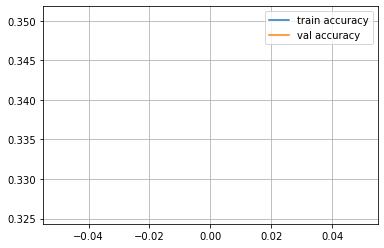

Epoch 1
Train accuracy: 0.3351984797297297
Val accuracy: 0.36166543483616653


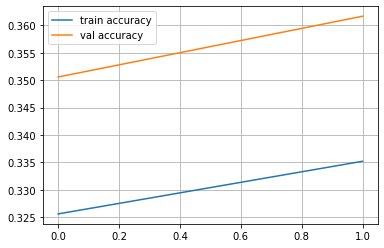

Epoch 2
Train accuracy: 0.3532516891891892
Val accuracy: 0.3754619364375462


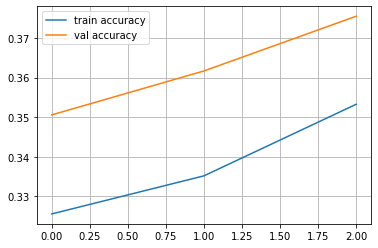

Epoch 3
Train accuracy: 0.3625422297297297
Val accuracy: 0.3789110618378911


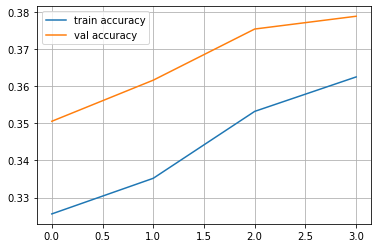

Epoch 4
Train accuracy: 0.37141047297297297
Val accuracy: 0.38112835673811285


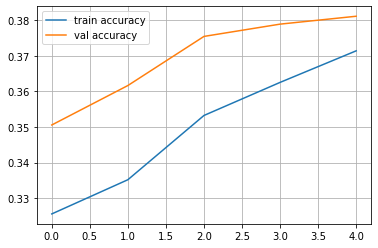

Epoch 5
Train accuracy: 0.37024915540540543
Val accuracy: 0.3707809805370781


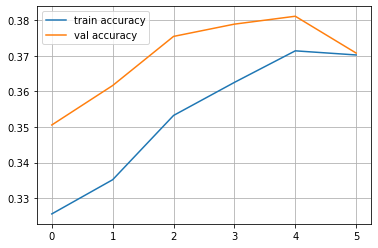

Epoch 6
Train accuracy: 0.37003800675675674
Val accuracy: 0.360679970436068


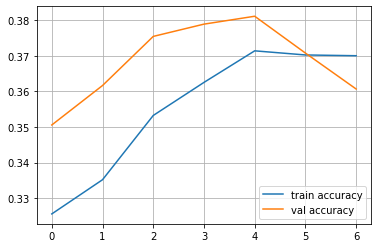

Epoch 7
Train accuracy: 0.37732263513513514
Val accuracy: 0.3540280857354028


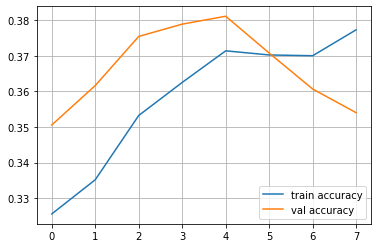

Epoch 8
Train accuracy: 0.37880067567567566
Val accuracy: 0.36215816703621584


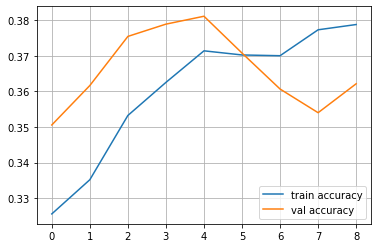

Epoch 9
Train accuracy: 0.38144003378378377
Val accuracy: 0.3574772111357477


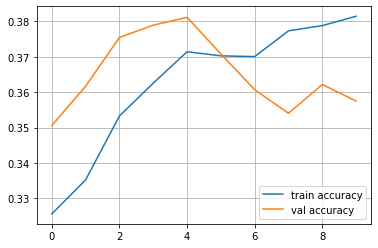

Epoch 10
Train accuracy: 0.3915751689189189
Val accuracy: 0.36363636363636365


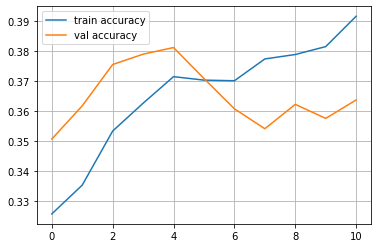

Epoch 11
Train accuracy: 0.40614442567567566
Val accuracy: 0.371520078837152


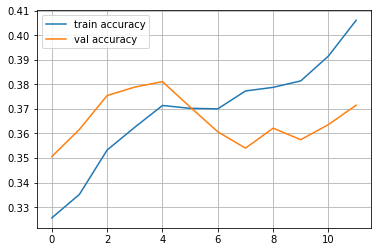

Epoch 12
Train accuracy: 0.4224028716216216
Val accuracy: 0.3890120719389012


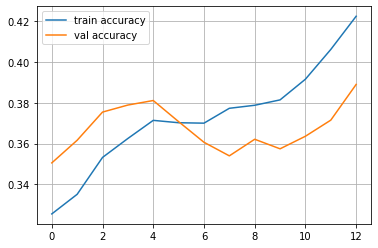

Epoch 13
Train accuracy: 0.43760557432432434
Val accuracy: 0.4077358955407736


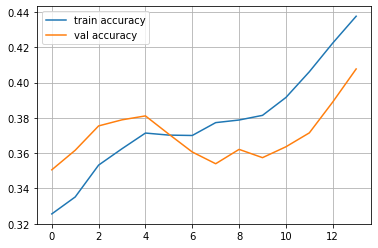

Epoch 14
Train accuracy: 0.453125
Val accuracy: 0.42374969204237495


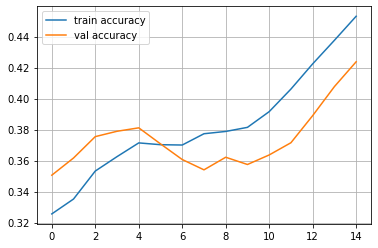

Epoch 15
Train accuracy: 0.4719172297297297
Val accuracy: 0.4434589800443459


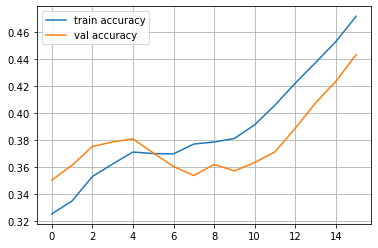

Epoch 16
Train accuracy: 0.48933699324324326
Val accuracy: 0.46316826804631683


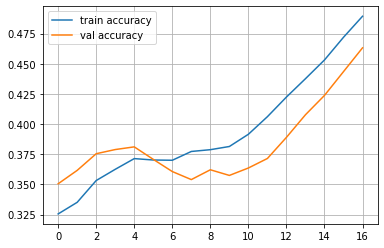

Epoch 17
Train accuracy: 0.5032728040540541
Val accuracy: 0.4816457255481646


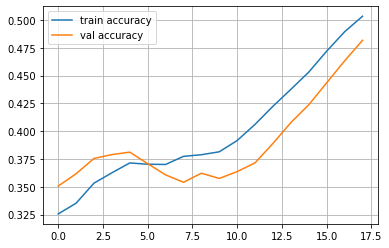

Epoch 18
Train accuracy: 0.5191089527027027
Val accuracy: 0.49815225424981524


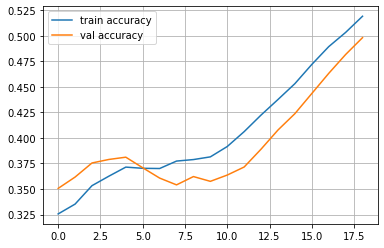

Epoch 19
Train accuracy: 0.5373733108108109
Val accuracy: 0.5146587829514658


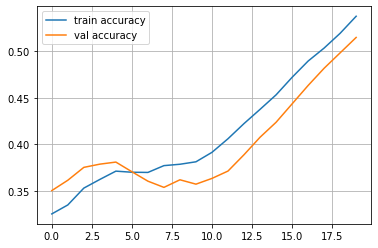

Epoch 20
Train accuracy: 0.547825168918919
Val accuracy: 0.5289480167528948


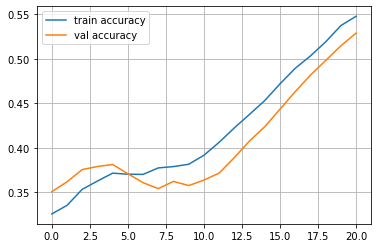

Epoch 21
Train accuracy: 0.5590160472972973
Val accuracy: 0.543729982754373


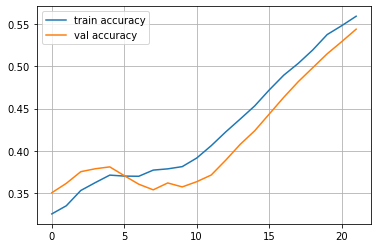

Epoch 22
Train accuracy: 0.5686233108108109
Val accuracy: 0.5540773589554078


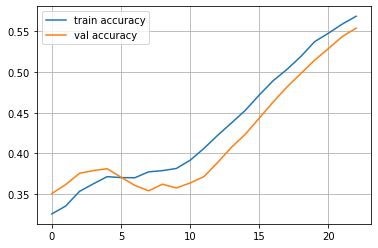

Epoch 23
Train accuracy: 0.5775971283783784
Val accuracy: 0.5639320029563932


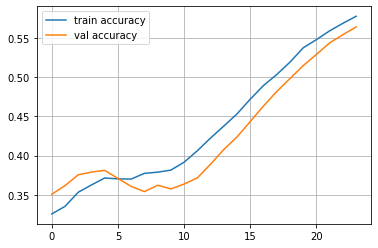

Epoch 24
Train accuracy: 0.5863597972972973
Val accuracy: 0.5740330130574033


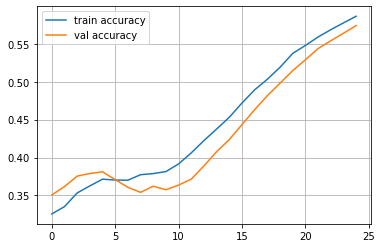

precision: 0.6568010895960275
recall: 0.5830547474773904
f1: 0.5697323811611611
accuracy: 0.5740330130574033
Confusion matrix: 
[[ 602  210  557]
 [  19  629  775]
 [ 132   36 1099]]


In [91]:
from IPython.display import clear_output
import numpy as np

network = MLP([10, 15, 20, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(25):
    network.fit(x_train, y_train.tolist())   
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test) == y_test))
    #clear_output()
    print("Epoch", epoch)
    print("Train accuracy:", train_log[-1])
    print("Val accuracy:", val_log[-1])  
    plt.plot(train_log,label = 'train accuracy')
    plt.plot(val_log,label = 'val accuracy')
    plt.legend(loc = 'best')
    plt.grid()
    plt.show()

y_pred = network.predict(x_test)

eval = Evaluate(y_test.tolist(), y_pred.tolist())
eval.get_evaluation_report()

## Έτοιμο Multi-Layer Perceptron 

Όπως και με τις τεχνικές των παραπάνω ερωτημάτων έτσι και εδώ υπάρχει έτοιμη η παραπάνω κλάση σε διάφορες βιβλιοθήκες. Έτσι στο δεύτερο μέρος του ερωτήματος αυτού θα κατασκευάσετε το ίδιο MLP χρησιμοποιώντας όμως την έτοιμη κλάση [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)  της βιβλιοθήκης scikit-learn. Παρακάτω παρουσιάζεται ένα παράδειγμα χρήσης της κλάσης αυτής. 

In [105]:
from sklearn.neural_network import MLPClassifier

epochs = 25
mlp = MLPClassifier(hidden_layer_sizes=(10, 15, 20), max_iter = epochs)

mlp.fit(x_train.tolist(),y_train.tolist())

y_pred = mlp.predict(x_test.tolist())
eval = Evaluate(y_test.tolist(), y_pred)
eval.get_evaluation_report()

precision: 0.7345673681607144
recall: 0.7272256856268368
f1: 0.725306481346311
accuracy: 0.7270263611727026
Confusion matrix: 
[[ 855  218  296]
 [  56 1123  244]
 [ 156  138  973]]


C:\Users\OWNER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(


## Σύγκριση υλοποιήσεων 

  

Στα παρακάτω κελιά πειραματιστείτε με τις δύο υλοποιήσεις (τη δική σας και την έτοιμη). Συγκρίνετε τα αποτελέσματά σας τόσο ως προς τους χρόνους εκτέλεσης αλλά και ως προς τα αποτελέσματα. Η διαφορά των αποτελεσμάτων προκύπτει από το ότι στην έτοιμη κλάση έχουν γίνει αρκετές βελτιστοποιήσεις στην λειτουργία, στον τρόπο εκπαίδευσης κ.α. με αποτέλεσμα να προκύπτουν καλύτερα αποτέλεσματα. Παρόλα αυτά στην δική μας κλάση έχουμε καλύτερο έλεγχο και έχουμε την δυνατότητα να σχεδιάσουμε πιο σύνθετες αρχιτεκτονικές καθώς να αλλάξουμε τις τιμές παραμέτρων που στην έτοιμη κλάση μπορεί να μην μας δίνεται η δυνατότητα. 


In [95]:
%%time
network = MLP([10, 15, 20, 3], len(inputs))

for epoch in range(1000):
    network.fit(x_train, y_train.tolist())   

y_pred = network.predict(x_test)

Wall time: 10.1 s


In [96]:
eval = Evaluate(y_test.tolist(), y_pred.tolist())
eval.get_evaluation_report()

precision: 0.7425923534178013
recall: 0.7202435112225958
f1: 0.716920627648384
accuracy: 0.7166789849716679
Confusion matrix: 
[[ 827  144  398]
 [  76 1001  346]
 [ 116   70 1081]]


In [101]:
%%time
network = MLP([100, 200, 100, 10], len(inputs))

for epoch in range(25):
    network.fit(x_train, y_train.tolist())   

y_pred = network.predict(x_test)

Wall time: 2.09 s


In [102]:
eval = Evaluate(y_test.tolist(), y_pred.tolist())
eval.get_evaluation_report()

precision: 0.6579424903665421
recall: 0.5643540186742474
f1: 0.5397557702663254
accuracy: 0.5538309928553831
Confusion matrix: 
[[ 813   68  488]
 [ 132  386  905]
 [ 214    4 1049]]


In [110]:
%%time
mlp = MLPClassifier(hidden_layer_sizes=(10, 15, 20), max_iter = 1000)

mlp.fit(x_train.tolist(),y_train.tolist())

y_pred = mlp.predict(x_test.tolist())

Wall time: 6.29 s


In [111]:
eval = Evaluate(y_test.tolist(), y_pred)
eval.get_evaluation_report()

precision: 0.7408239413172532
recall: 0.7374045855070336
f1: 0.7372415133314253
accuracy: 0.7371273712737128
Confusion matrix: 
[[ 989  120  260]
 [ 137 1053  233]
 [ 222   95  950]]


In [116]:
%%time
mlp = MLPClassifier(hidden_layer_sizes=(100, 200, 100, 100), max_iter = 1000)

mlp.fit(x_train.tolist(),y_train.tolist())

y_pred = mlp.predict(x_test.tolist())

Wall time: 1min 29s


In [117]:
eval = Evaluate(y_test.tolist(), y_pred)
eval.get_evaluation_report()

precision: 0.7158701272441591
recall: 0.7125027153794715
f1: 0.7126045796298589
accuracy: 0.7127371273712737
Confusion matrix: 
[[ 938  133  298]
 [ 135 1048  240]
 [ 240  120  907]]


# Αξιολόγηση- Συμπεράσματα 

  

Τέλος στο σημείο αυτό καλείστε να αξιολογήσετε τις διάφορες τεχνικές ταξινόμησης (KNN, Naive Bayes, MLP), τα αποτελέσματά τους, τους χρόνους εκτέλεσης, και να παραθέσετε παρατηρήσεις καθώς και οτιδήποτε σας φάνηκε ενδιαφέρον ή ιδιαίτερο. 



Απάντηση/Σχολιασμός:

Σε όλες τις τεχνικές ταξινόμησης είχαμε περίπου ίδιες αποδόσεις, γύρω στο 0.7 για τα metrics. Τις πιο υψηλές τις πετυχαίνει ο έτοιμος MLP, ενώ όσο πιο περίπλοκος είναι και όσες περισσότερες εποχές τρέχει τόσο καλύτερη είναι και η απόδοση με κόστος όμως σε χρόνο και υπολογιστικούς πόρους.

Ενδιαφέρον αποτελεί το γεγονός οτι όσο περισσότερο αυξάνουμε την πολυπλοκότητα του κάθε ταξινομητή, με σκοπό να πετύχουμε καλύτερα Metrics, τόσο βραδύτερα αυξάνεται και η απόδοση, ενώ είναι πιθανό να μην μπορεί να ξεπεράσει ορισμένες τιμές.

